<a href="https://colab.research.google.com/github/OctavioSantalucia/econometria/blob/main/ejercicios/C8.1%20Heterocedasticidad2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

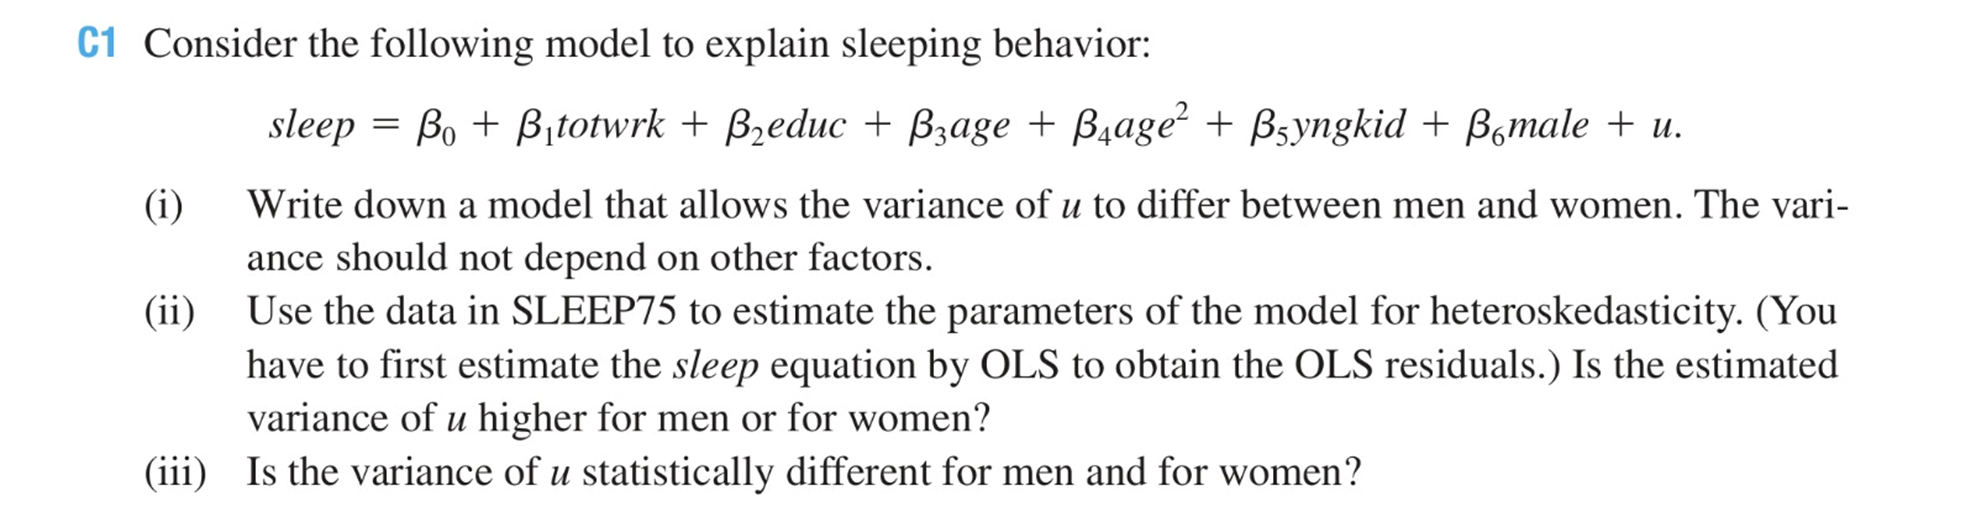

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

Las referencias de las variables estan aqui:
https://github.com/rpasquini/econometria/blob/main/datos/datasets_wooldridge/SLEEP75_description.txt

In [2]:
columns=["age"     , "black"   , "case"    , "clerical", "construc", "educ"    , "earns74" , "gdhlth"  ,
"inlf"    , "leis1"   , "leis2"   , "leis3"   , "smsa"    , "lhrwage" , "lothinc" , "male"    ,
"marr"    , "prot"    , "rlxall"  , "selfe"   , "sleep"   , "slpnaps" , "south"   , "spsepay" ,
"spwrk75" , "totwrk"  , "union"   , "worknrm" , "workscnd", "exper"   , "yngkid"  , "yrsmarr" ,
"hrwage"  , "agesq"]

In [3]:
df=pd.read_excel('https://github.com/rpasquini/econometria/blob/main/datos/datasets_wooldridge/sleep75.xls?raw=true', header=None)


In [4]:
df.columns=columns

In [5]:
df.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.53,1936
3,30,0,4,0.0,0.0,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.75,4096


i) Write down a model that allows the variance of u to differ between men and women. The variance should not depend on other factors.

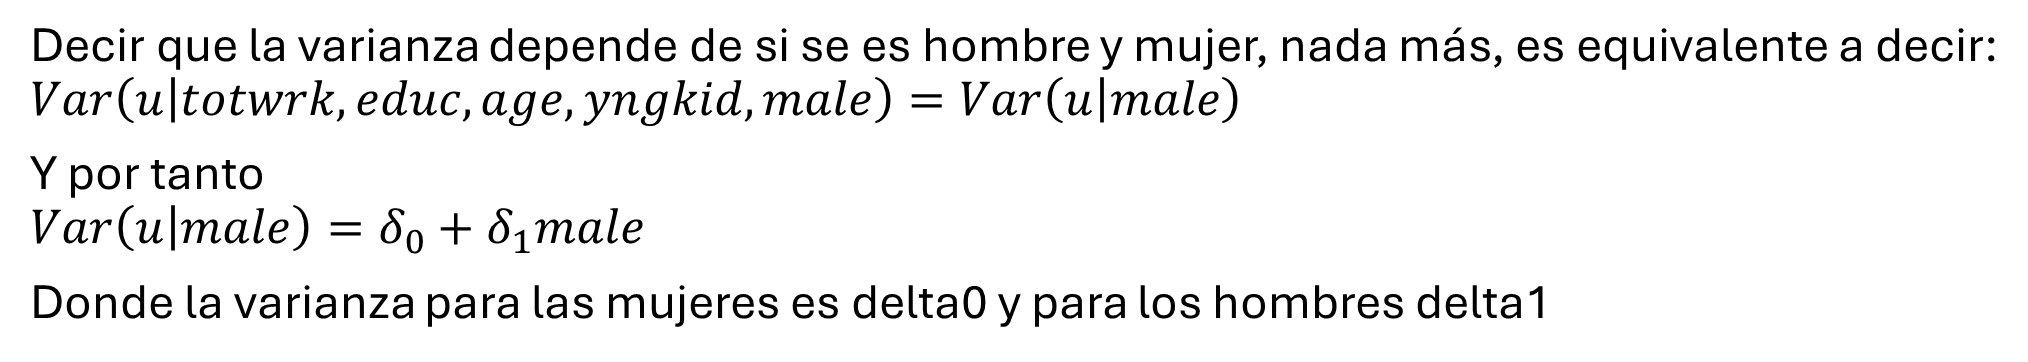

ii) Estimate the parameters of the model for heteroskedasticity. Is the variance of u higher for men or women?

In [6]:
#para estudiar si el modelo presenta o no heterocedasticidad hay que primero hacer la regresión

def regress(lista, data):
  """
  Funcion que realiza la regresion OLS
  La primera variable de la lista es la dependiente, el resto son las explicativas
  data es la base de datos
  """
  #datos=data[lista]
  # el metodo dropna() me permite eliminar las filas que tienen algun valor missing
  #datos=datos.dropna()
  Y=data[lista[0]]
  X=data[lista[1:]]
  X=sm.add_constant(X)
  modelo=sm.OLS(Y,X, missing='drop')
  resultados=modelo.fit()
  print(resultados.summary())
  return resultados

In [7]:
resultados=regress(["sleep", "totwrk", "educ", "age", "agesq", "yngkid", "male"], df)

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     16.30
Date:                Mon, 19 May 2025   Prob (F-statistic):           1.28e-17
Time:                        19:15:55   Log-Likelihood:                -5259.3
No. Observations:                 706   AIC:                         1.053e+04
Df Residuals:                     699   BIC:                         1.056e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3840.8521    239.414     16.043      0.0

In [8]:
#ahora que tenemos el modelo OLS necesitamos analizar los errores y ver si los errores son constantes para todo valor de nuestra variable "male"
#para ello extraemos los errores y los asignamos a una columna. luego también elevamos al cuadrado para evitar que se cancelen errores positivos con negativos.
df['residuos']=resultados.resid
df['residuos2']=df['residuos']*df['residuos']


In [9]:
#ahora corremos una nueva regresión, que analice el efecto del sexo "male" en los errores cuadrados.
resultados2=regress(["residuos2", "male"], df)

                            OLS Regression Results                            
Dep. Variable:              residuos2   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.117
Date:                Mon, 19 May 2025   Prob (F-statistic):              0.291
Time:                        19:15:55   Log-Likelihood:                -10032.
No. Observations:                 706   AIC:                         2.007e+04
Df Residuals:                     704   BIC:                         2.008e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.894e+05   2.05e+04      9.216      0.0

ii) Vemos que entonces, la variable male tiene coeficiente negativo. Esto significa entonces que el error es menor para los hombres que para las mujeres.

iii) Sin embargo, el coeficiente de 'male' no es significativo dado su p-value de 0.291. Por ende no parece que haya heterocedasticidad en la variable 'male'.

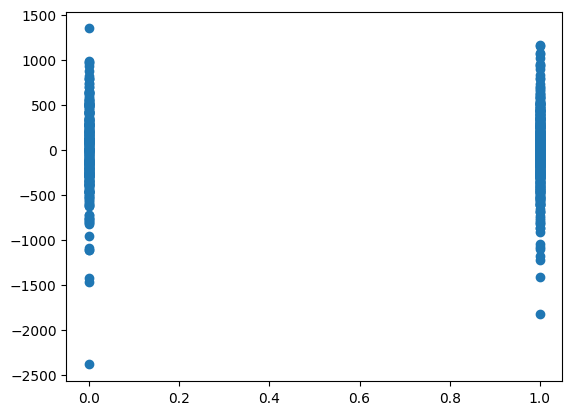

In [10]:
#para verificar la conclusión de iii) podemos usar este histograma. vemos que la distribución es bastante similar para 0 (mujeres) que para 1 (hombres) para hombres
plt.scatter(df['male'],df['residuos'])

In [16]:
def regressh(lista, data):
  """
  Funcion que realiza la regresion OLS
  La primera variable de la lista es la dependiente, el resto son las explicativas
  data es la base de datos
  """
  #datos=data[lista]
  # el metodo dropna() me permite eliminar las filas que tienen algun valor missing
  #datos=datos.dropna()
  Y=data[lista[0]]
  X=data[lista[1:]]
  X=sm.add_constant(X)
  modelo=sm.OLS(Y,X, missing='drop')
  resultados=modelo.fit(cov_type='HC0')
  print(resultados.summary())
  return resultados

In [17]:
resultadosh=regressh(["sleep", "totwrk", "educ", "age", "agesq", "yngkid", "male"], df)

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     14.44
Date:                Mon, 19 May 2025   Prob (F-statistic):           1.45e-15
Time:                        19:16:58   Log-Likelihood:                -5259.3
No. Observations:                 706   AIC:                         1.053e+04
Df Residuals:                     699   BIC:                         1.056e+04
Df Model:                           6                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3840.8521    257.838     14.896      0.0